### Sampling site directional data

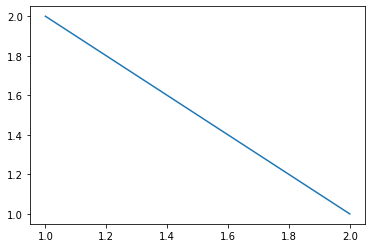

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2], [2,1])

In [2]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import smpsite.smpsite as smp

In [11]:
%%time

params0 = smp.Params(kappa_within_site=smp.angular2kappa(2),
                     site_lat=45,
                     outlier_rate=0.05,
                     n=40,
                     k=10, 
                     site_lon=0.0)

df_sample = smp.generate_samples(params0, secular_method="tk03")
display(df_sample)

,sample_site,vgp_lon,vgp_lat,vgp_dec,vgp_inc,is_outlier
0,0,207.524252,49.553747,342.397320,14.838142,0
1,0,206.037792,49.834501,343.406754,14.756049,0
2,0,202.853530,51.077279,345.731910,15.871352,0
3,0,203.518271,50.420933,345.138282,14.902015,0
4,0,207.993496,48.970996,341.911006,13.983767,0
...,...,...,...,...,...,...
395,39,204.683427,67.864280,350.051166,42.198097,0
396,39,207.964893,64.537229,347.467264,38.530976,0
397,39,201.736885,66.577313,350.809889,40.074006,0
398,39,209.481793,67.250180,347.931419,42.294995,0


CPU times: user 112 ms, sys: 505 µs, total: 112 ms
Wall time: 111 ms


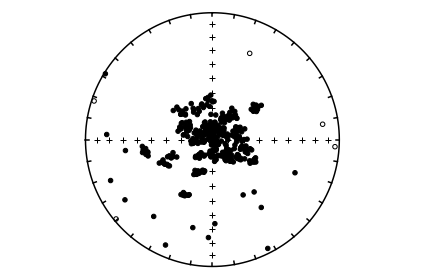

In [12]:
ipmag.plot_net(1)
ipmag.plot_di(dec=df_sample.vgp_lon.values, inc=df_sample.vgp_lat.values)

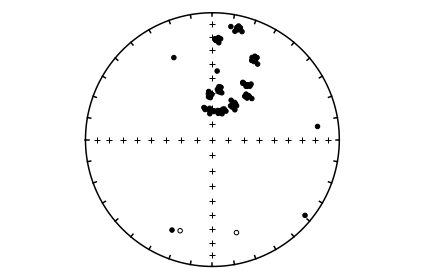

In [10]:
ipmag.plot_net(1)
ipmag.plot_di(dec=df_sample.vgp_dec.values, inc=df_sample.vgp_inc.values)

In [6]:
ipmag.tk03??

Signature:
ipmag.tk03(
    n=100,
    dec=0,
    lat=0,
    rev='no',
    G1=-18000.0,
    G2=0,
    G3=0,
    B_threshold=0,
)
Source:   
def tk03(n=100, dec=0, lat=0, rev='no', G1=-18e3, G2=0, G3=0, B_threshold=0):
    """
    Generates vectors drawn from the TK03.gad model of secular
    variation (Tauxe and Kent, 2004) at given latitude and rotated
    about a vertical axis by the given declination. Returns a nested list of
    of [dec,inc,intensity].

    Parameters
    ----------
    n : number of vectors to determine (default is 100)
    dec : mean declination of data set (default is 0)
    lat : latitude at which secular variation is simulated (default is 0)
    rev : if reversals are to be included this should be 'yes' (default is 'no')
    G1 : specify average g_1^0 fraction (default is -18e3 in nT, minimum = 1)
    G2 : specify average g_2^0 fraction (default is 0)
    G3 : specify average g_3^0 fraction (default is 0)
    B_threshold : return vectors with B>B_threshold (in 

In [7]:
pmag.mktk03??

Signature: pmag.mktk03(terms, seed, G2, G3, G1=-18000.0, verbose=False)
Source:   
def mktk03(terms, seed, G2, G3,G1=-18e3,verbose=False):
    """
    Generates a list of gauss coefficients drawn from the TK03 distribution.
    
    Parameters
    ----------
    terms : int
            number of terms to return
    seed : random seed
    G2 : int
         ratio of axial quadrupole term to dipole term
    G3 : int
         ratio of axial octupole term to dipole term
    G1 : float
         value of the axial dipole, default is -18e3 (in nT)
    verbose : default is False
    
    Returns
    -------
    gh : list
        list of l,m,g,h field model generated by TK03
    """
# random.seed(n)
    n = seed
    gh = []
    g10, beta, afact = G1, 3.8, 2.4
    g20 = G2 * g10
    g30 = G3 * g10
    alpha = g10/afact
    s1 = s_l(1, alpha=alpha)
    s10 = beta * s1
    gnew = random.normal(g10, s10)
    if verbose: 
        print(1, 0, gnew, 0)
    gh.append(gnew)
    gh.append(random.normal(0,

In [8]:
pmag.vgp_di??

Signature: pmag.vgp_di(plat, plong, slat, slong)
Source:   
def vgp_di(plat, plong, slat, slong):
    """
    Converts a pole position (pole latitude, pole longitude) to a direction
    (declination, inclination) at a given location (slat, slong) assuming a
    dipolar field.

    Parameters
    ----------
    plat : latitude of pole (vgp latitude)
    plong : longitude of pole (vgp longitude)
    slat : latitude of site
    slong : longitude of site

    Returns
    -------
    dec,inc : tuple of declination and inclination
    """
    plong = plong % 360
    slong = slong % 360
    signdec = 1.
    delphi = abs(plong - slong)
    if delphi != 0:
        signdec = (plong - slong) / delphi
    if slat == 90.:
        slat = 89.99
    thetaS = np.radians(90. - slat)
    thetaP = np.radians(90. - plat)
    delphi = np.radians(delphi)
    cosp = np.cos(thetaS) * np.cos(thetaP) + np.sin(thetaS) * \
        np.sin(thetaP) * np.cos(delphi)
    thetaM = np.arccos(cosp)
    cosd = old_div((np.

In [9]:
import numpy as np
pmag.vgp_di(np.array([50, 55]), np.array([50,25]), 40, 40)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()